In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day','month','year'],axis=True,inplace=True)

In [7]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [ ]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [14]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [62]:
x=df.drop('FWI',axis=1)
y=df[['FWI']]

In [63]:
x.shape,y.shape

((243, 11), (243, 1))

In [64]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((182, 11), (182, 1), (61, 11), (61, 1))

<AxesSubplot: >

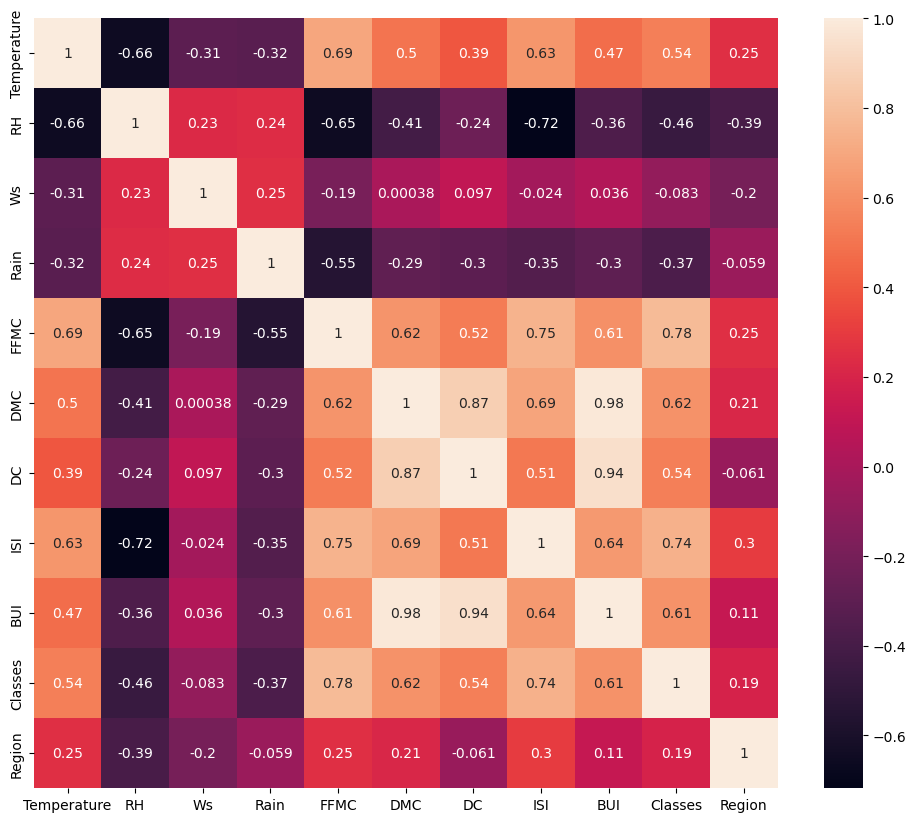

In [82]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [83]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [84]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr                

In [85]:
corr_features=correlation(x_train,0.85)

In [86]:
corr_features

{'BUI', 'DC'}

In [87]:
#drop high;y correlated features than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [88]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [89]:
y_train.shape,y_test.shape

((182, 1), (61, 1))

In [90]:
 x_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

In [97]:
#Scaling and Standardization

from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
x_train_scaled=scaler1.fit_transform(x_train)
x_test_scaled=scaler1.transform(x_test)

In [98]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/tmp/ipykernel_1557/2707537849.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


Text(0.5, 1.0, 'x_train after scaling')

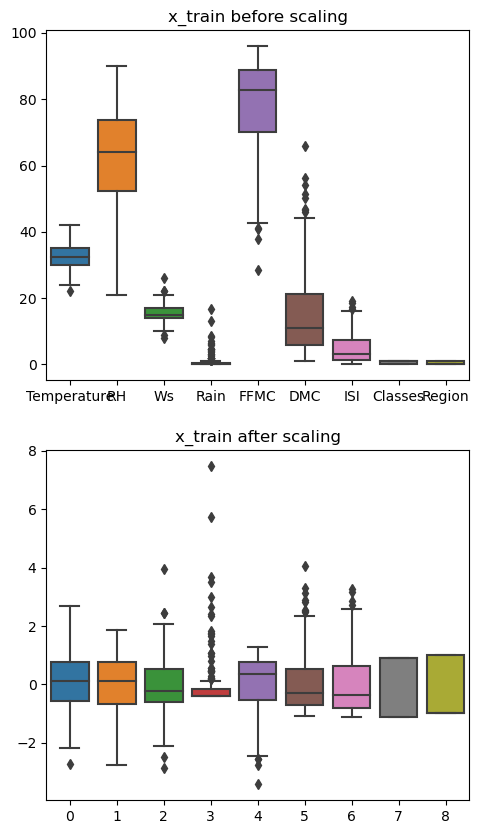

In [93]:
plt.subplots(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(2,2,3)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

In [100]:
#linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)

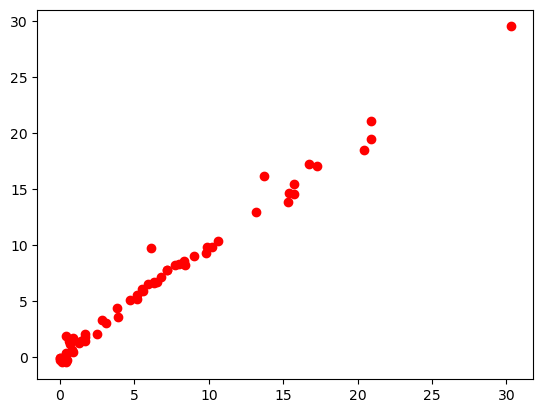

In [102]:
plt.scatter(y_test,y_pred,c='r')

In [103]:
mae=mean_absolute_error(y_test,y_pred)


In [104]:
mae

0.5468236465249985

In [112]:
score=r2_score(y_test,y_pred)

In [106]:
score

0.9847657384266951

In [107]:
##Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred1=lasso.predict(x_test_scaled)

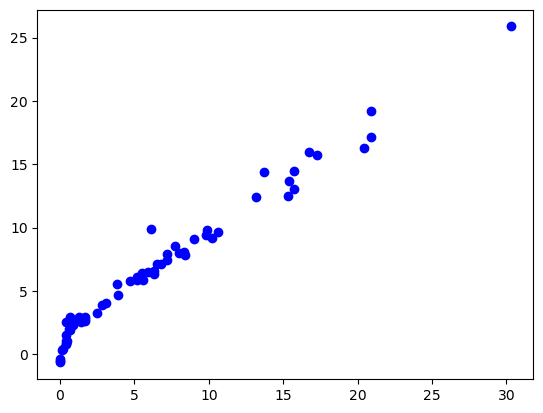

In [110]:
plt.scatter(y_test,y_pred1,c='b')

In [113]:
mae1=mean_absolute_error(y_test,y_pred1)
score1=r2_score(y_test,y_pred1)


In [114]:
mae1,score1

(1.133175994914409, 0.9492020263112388)

In [115]:
mae,score

(0.5468236465249985, 0.9847657384266951)

In [117]:
##Ridge 
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred2=ridge.predict(x_test_scaled)

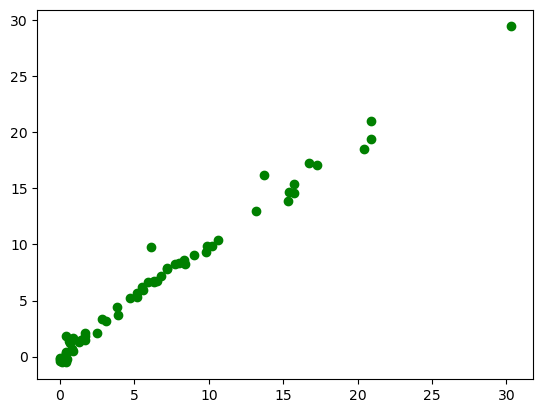

In [120]:
plt.scatter(y_test,y_pred2,c='g')

In [121]:
mae2=mean_absolute_error(y_test,y_pred2)
score2=r2_score(y_test,y_pred2)

In [122]:
mae2,score2

(0.5642305340105692, 0.9842993364555513)

In [123]:
##ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred3=elasticnet.predict(x_test_scaled)


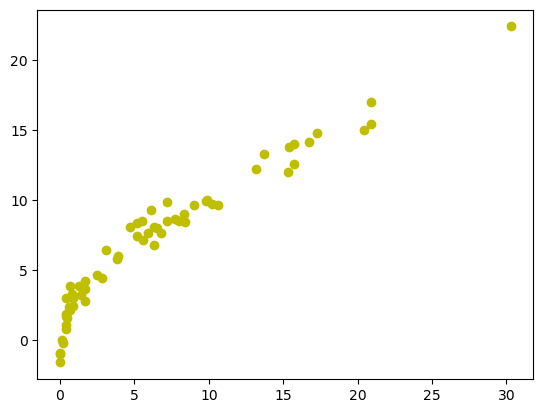

In [124]:
plt.scatter(y_test,y_pred3,c='y')

In [125]:
mae3=mean_absolute_error(y_test,y_pred3)
score3=r2_score(y_test,y_pred3)

In [126]:
mae3,score3

(1.8822353634896005, 0.8753460589519703)

Pickling

In [127]:
import pickle


In [128]:
pickle.dump(scaler1,open('scaler1.pkl','wb'))
pickle.dump(linreg,open('linreg.pkl','wb'))
pickle.dump(lasso,open('lasso.pkl','wb'))
pickle.dump(elasticnet,open('elasticnet','wb'))